In [2]:
#importing the required packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#uploading dataset
from google.colab import drive
drive.mount('/content/drive')
HRData = pd.read_csv(r'/content/drive/MyDrive/student/train.csv',header = 0)
Test = pd.read_csv(r'/content/drive/MyDrive/student/test.csv',header = 0)

#HRData = pd.read_csv(r"C:\Users\Dlc\Downloads\train.csv",header=0)
HRData_BK= HRData.copy()
HRData.head()
Test_BK = Test.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#examining the dataset
print('Shape of the dataset:', HRData.shape)

Shape of the dataset: (54808, 13)


In [5]:
#displaying the first five rows
HRData.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [6]:
#displaying the last five columns
HRData.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49,0


In [7]:
#displaying the random columns
HRData.sample(6)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
47353,42394,Analytics,region_2,Master's & above,m,sourcing,2,50,5.0,17,0,85,0
2095,61562,Sales & Marketing,region_22,Bachelor's,m,referred,1,32,3.0,7,0,48,0
25837,33620,Analytics,region_25,Bachelor's,m,other,3,32,3.0,5,0,88,0
2302,5024,Sales & Marketing,region_26,Bachelor's,m,sourcing,1,35,3.0,7,0,55,0
23322,35781,HR,region_13,Bachelor's,m,other,1,39,3.0,11,0,49,0
30354,17476,Operations,region_2,Bachelor's,f,other,1,60,1.0,14,0,63,0


In [8]:
#information about the dataset
HRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [9]:
#describing the dataset
HRData.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Visualizing the Data

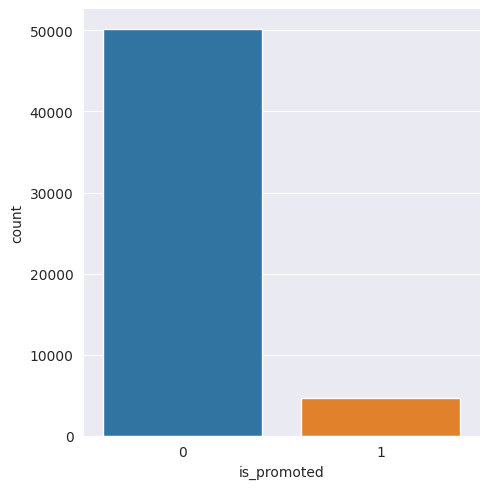

In [10]:
#Plotting target Variable
sns.set_style('darkgrid')
sns.catplot(x ='is_promoted', kind='count', data=HRData)
plt.show()

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'awards_won?'}>],
       [<Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>, <Axes: >]], dtype=object)

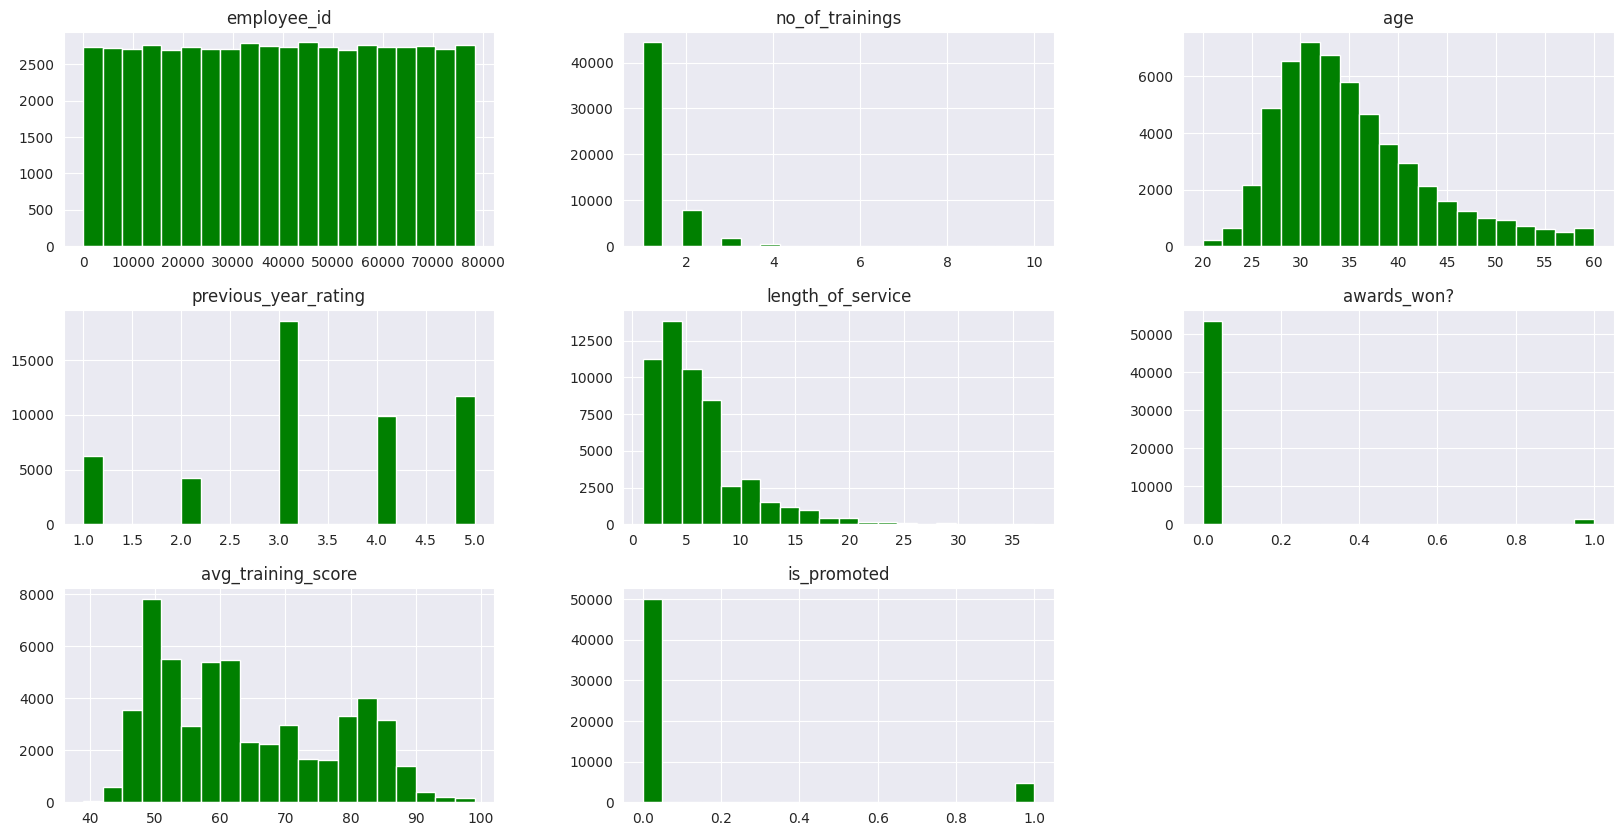

In [11]:
#Data distribution
HRData.hist(bins = 20, figsize = (20,10), color = 'g')

<Axes: >

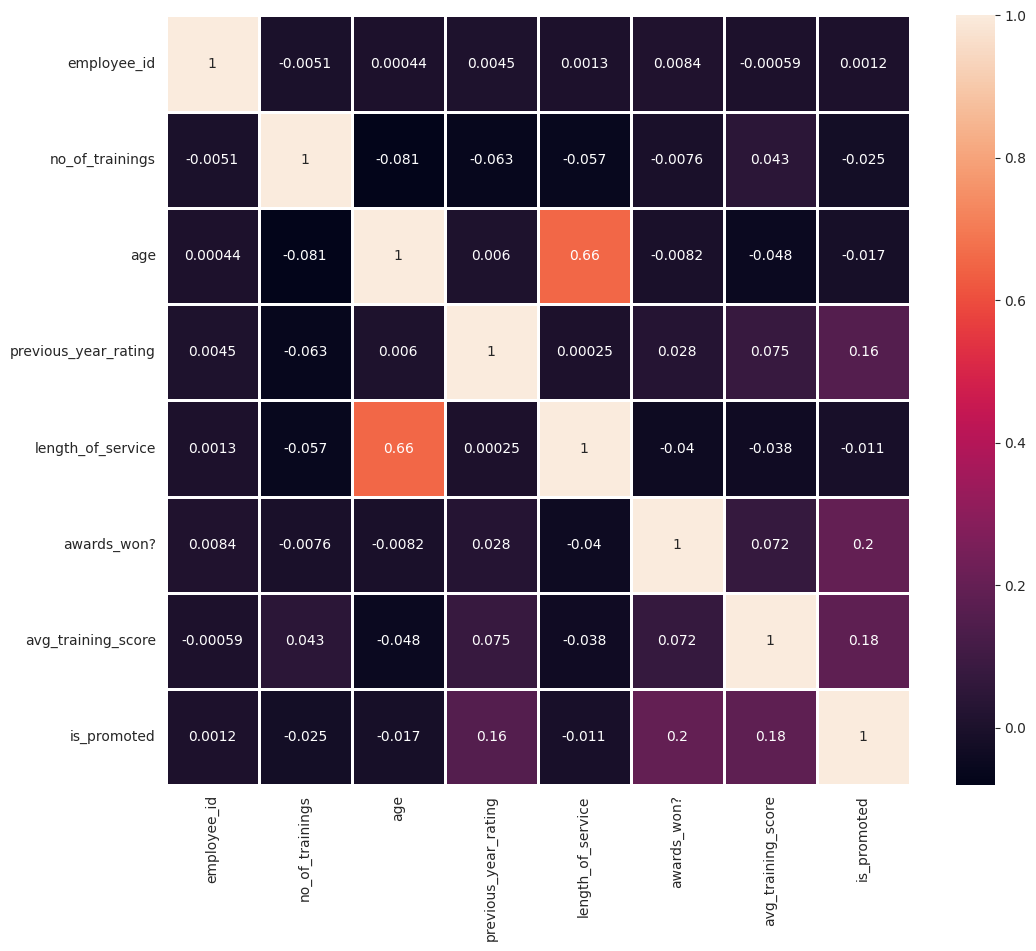

In [12]:
#Plotting correlation
plt.figure(figsize = (12, 10))
sns.heatmap(HRData.corr(), annot=True, square=False, linewidth=0.8)

Data preprocessing

In [13]:
#deletig the rows
del HRData['employee_id']

In [14]:
# information about the hrdata(train data)
HRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [15]:
#checking for null values

HRData.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [16]:
#to get the no of different streams
HRData['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [17]:
#using simple imputer for missing values
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
HRData['education']=si.fit_transform(HRData[['education']])

In [18]:
HRData['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [19]:
#KNNImputer for missing floating values
from sklearn.impute import KNNImputer
imputer_knn=KNNImputer(missing_values=np.nan)
HRData['previous_year_rating']=imputer_knn.fit_transform(HRData[['previous_year_rating']])

In [20]:
#label encoder to convert string values into integer values
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
HRData['department'] = LE.fit_transform(HRData[['department']])
HRData['education'] = LE.fit_transform(HRData[['education']])
HRData['previous_year_rating'] = LE.fit_transform(HRData[['previous_year_rating']])
HRData['region'] = LE.fit_transform(HRData[['region']])
HRData['gender'] = LE.fit_transform(HRData[['gender']])
HRData['recruitment_channel'] = LE.fit_transform(HRData[['recruitment_channel']])

In [21]:
# checking for duplicate values in the dataset
HRData_dup = HRData[HRData.duplicated(keep='last')]
HRData_dup

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
21,4,6,0,1,2,1,41,4,11,0,57,0
123,4,14,0,0,2,1,27,3,1,0,58,0
327,0,17,0,1,2,1,32,2,6,0,86,0
485,2,14,2,0,0,1,33,5,7,0,50,0
790,7,19,0,1,2,1,32,0,6,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47484,4,14,0,0,0,1,27,4,2,0,56,0
49050,7,27,0,1,0,1,28,0,4,0,52,0
49306,2,31,0,1,0,1,27,3,1,0,51,0
50190,7,33,2,1,2,1,28,2,4,0,51,0


In [22]:
#information for Test Dataset
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [23]:
#simple imputer to fill null values
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Test['education']=si.fit_transform(Test[['education']])

In [24]:
#KNNImputer for missing floating values
from sklearn.impute import KNNImputer
imputer_knn=KNNImputer(missing_values=np.nan)
Test['previous_year_rating']=imputer_knn.fit_transform(Test[['previous_year_rating']])

In [25]:
#label encoder for to convert string values into integers based on the value count
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Test['department'] = LE.fit_transform(Test[['department']])
Test['education'] = LE.fit_transform(Test[['education']])
Test['previous_year_rating'] = LE.fit_transform(Test[['previous_year_rating']])
Test['region'] = LE.fit_transform(Test[['region']])
Test['gender'] = LE.fit_transform(Test[['gender']])
Test['recruitment_channel'] = LE.fit_transform(Test[['recruitment_channel']])

In [26]:
#to get duplicates in the dataset
Test_dup = Test[Test.duplicated(keep='last')]
Test_dup

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score


In [27]:
#to get the rows and columns of the dataset
HRData.shape

(54808, 12)

In [28]:
#count the target or dependent variable by 0 or 1 and their propotion

ispromoted_count = HRData.is_promoted.value_counts()
print('Class 0:',ispromoted_count[0])
print('Class 1:', ispromoted_count[1])
print('Proportion:', round(ispromoted_count[0] / ispromoted_count[1], 2), ': 1')
print('Total left emp records', len(HRData))

Class 0: 50140
Class 1: 4668
Proportion: 10.74 : 1
Total left emp records 54808


In [29]:
#checking for null values
HRData.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Splitting the DataSet into Train and Test

In [30]:
#splitting the values for the target variable
IndepVar = []
for col in HRData.columns:
    if col != 'is_promoted':
        IndepVar.append(col)
TargetVar = 'is_promoted'
x = HRData[IndepVar]
y = HRData[TargetVar]

In [31]:

#random oversampling can be implemented using the RandomOverSampler class
from imblearn.over_sampling import RandomOverSampler
Oversample=RandomOverSampler(sampling_strategy=0.125)
x_over,y_over=Oversample.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape)

(56407, 11)
(56407,)


In [32]:
# Scaling the features by using MinMaxScaler

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((39484, 11), (16923, 11), (39484,), (16923,))

In [33]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

Comparing the Algorithms

KNN Algorithm

In [34]:
from google.colab import drive
drive.mount('/content/drive')
KNN_Results = pd.read_csv(r'/content/drive/MyDrive/student/KNN_Results.csv',header = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[  998   876]
 [  983 14066]]
Outcome values : 
 998 876 983 14066
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.53      0.52      1874
           0       0.94      0.93      0.94     15049

    accuracy                           0.89     16923
   macro avg       0.72      0.73      0.73     16923
weighted avg       0.89      0.89      0.89     16923

Accuracy : 89.0 %
Precision : 50.4 %
Recall : 53.3 %
F1 Score : 0.518
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 73.4 %
MCC : 0.456
roc_auc_score: 0.734


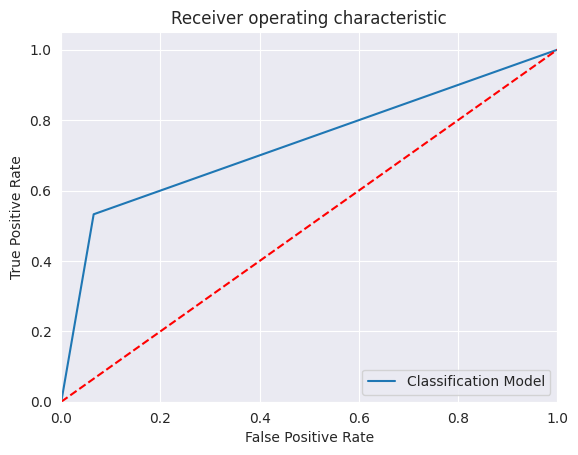

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  462  1412]
 [  299 14750]]
Outcome values : 
 462 1412 299 14750
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.25      0.35      1874
           0       0.91      0.98      0.95     15049

    accuracy                           0.90     16923
   macro avg       0.76      0.61      0.65     16923
weighted avg       0.88      0.90      0.88     16923

Accuracy : 89.9 %
Precision : 60.7 %
Recall : 24.7 %
F1 Score : 0.351
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 61.3 %
MCC : 0.343
roc_auc_score: 0.613


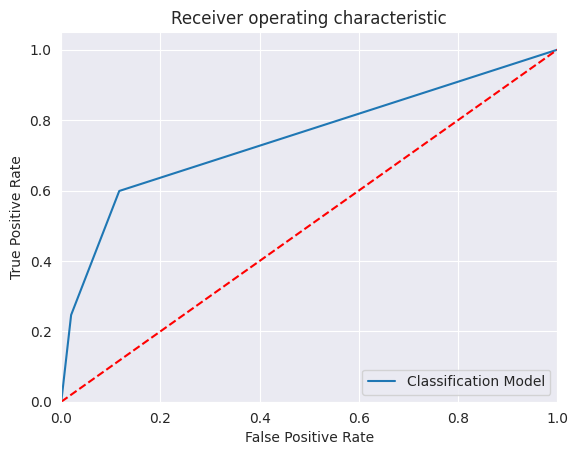

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  608  1266]
 [  585 14464]]
Outcome values : 
 608 1266 585 14464
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.32      0.40      1874
           0       0.92      0.96      0.94     15049

    accuracy                           0.89     16923
   macro avg       0.71      0.64      0.67     16923
weighted avg       0.87      0.89      0.88     16923

Accuracy : 89.1 %
Precision : 51.0 %
Recall : 32.4 %
F1 Score : 0.396
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 64.2 %
MCC : 0.35
roc_auc_score: 0.643


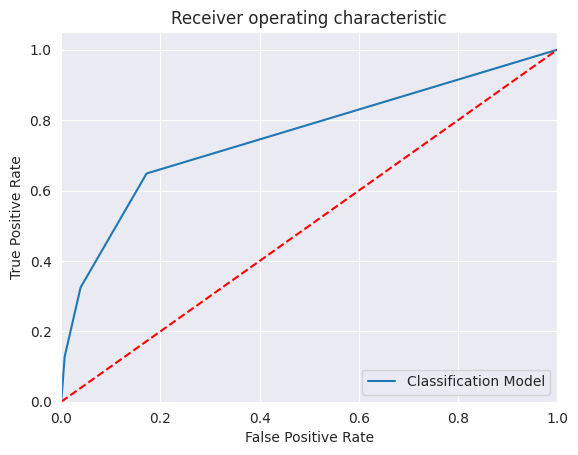

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  358  1516]
 [  220 14829]]
Outcome values : 
 358 1516 220 14829
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.19      0.29      1874
           0       0.91      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.76      0.59      0.62     16923
weighted avg       0.88      0.90      0.87     16923

Accuracy : 89.7 %
Precision : 61.9 %
Recall : 19.1 %
F1 Score : 0.292
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 58.8 %
MCC : 0.305
roc_auc_score: 0.588


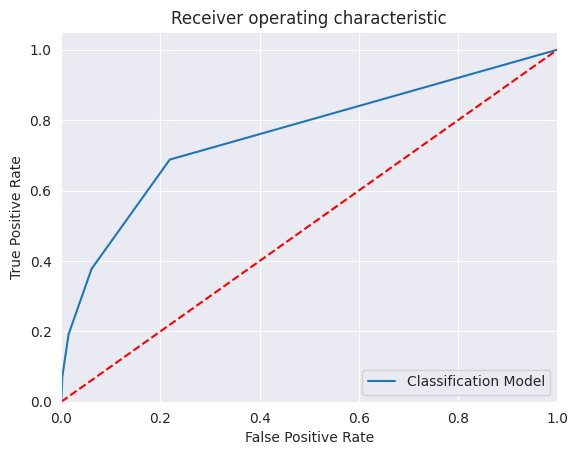

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  443  1431]
 [  355 14694]]
Outcome values : 
 443 1431 355 14694
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.24      0.33      1874
           0       0.91      0.98      0.94     15049

    accuracy                           0.89     16923
   macro avg       0.73      0.61      0.64     16923
weighted avg       0.87      0.89      0.88     16923

Accuracy : 89.4 %
Precision : 55.5 %
Recall : 23.6 %
F1 Score : 0.332
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 60.6 %
MCC : 0.315
roc_auc_score: 0.606


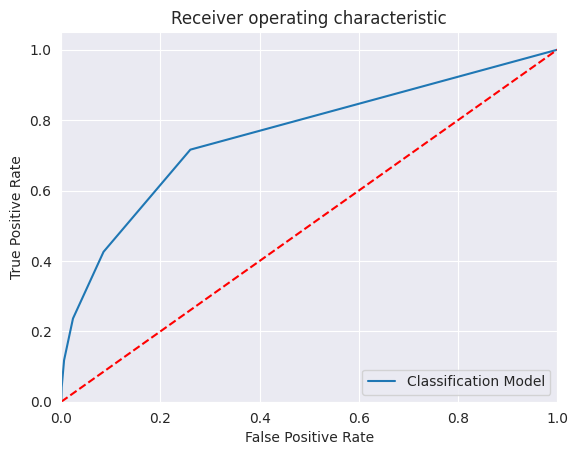

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  280  1594]
 [  153 14896]]
Outcome values : 
 280 1594 153 14896
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.15      0.24      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.77      0.57      0.59     16923
weighted avg       0.87      0.90      0.87     16923

Accuracy : 89.7 %
Precision : 64.7 %
Recall : 14.9 %
F1 Score : 0.243
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 57.0 %
MCC : 0.277
roc_auc_score: 0.57


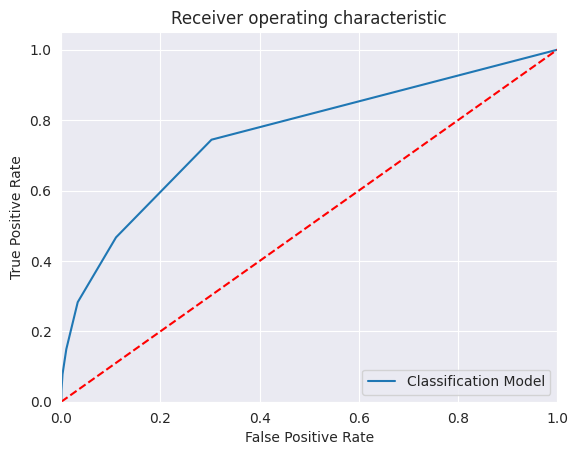

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  366  1508]
 [  225 14824]]
Outcome values : 
 366 1508 225 14824
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.20      0.30      1874
           0       0.91      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.76      0.59      0.62     16923
weighted avg       0.88      0.90      0.87     16923

Accuracy : 89.8 %
Precision : 61.9 %
Recall : 19.5 %
F1 Score : 0.297
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 59.0 %
MCC : 0.308
roc_auc_score: 0.59


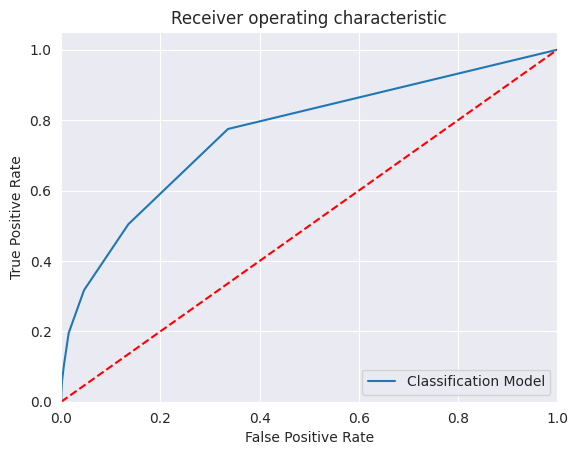

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  253  1621]
 [  123 14926]]
Outcome values : 
 253 1621 123 14926
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.14      0.22      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.79      0.56      0.58     16923
weighted avg       0.88      0.90      0.87     16923

Accuracy : 89.7 %
Precision : 67.3 %
Recall : 13.5 %
F1 Score : 0.225
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 56.4 %
MCC : 0.27
roc_auc_score: 0.563


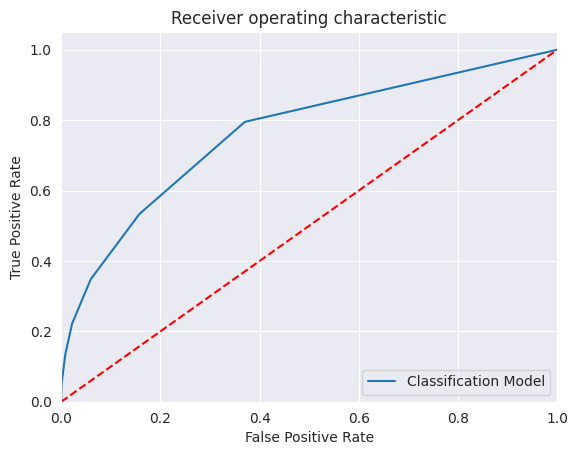

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  300  1574]
 [  176 14873]]
Outcome values : 
 300 1574 176 14873
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.16      0.26      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.77      0.57      0.60     16923
weighted avg       0.87      0.90      0.87     16923

Accuracy : 89.7 %
Precision : 63.0 %
Recall : 16.0 %
F1 Score : 0.255
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 57.4 %
MCC : 0.282
roc_auc_score: 0.574


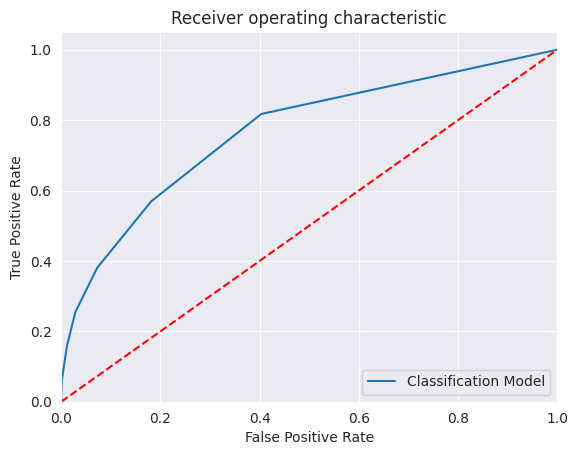

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  229  1645]
 [  112 14937]]
Outcome values : 
 229 1645 112 14937
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.12      0.21      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.79      0.56      0.58     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.6 %
Precision : 67.2 %
Recall : 12.2 %
F1 Score : 0.207
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 55.8 %
MCC : 0.256
roc_auc_score: 0.557


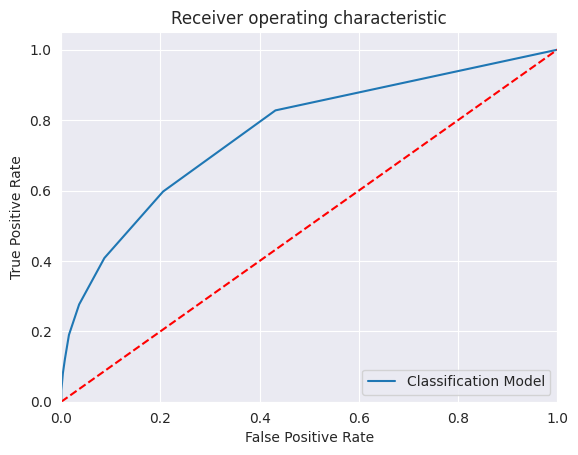

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  276  1598]
 [  158 14891]]
Outcome values : 
 276 1598 158 14891
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.15      0.24      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.77      0.57      0.59     16923
weighted avg       0.87      0.90      0.87     16923

Accuracy : 89.6 %
Precision : 63.6 %
Recall : 14.7 %
F1 Score : 0.239
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 56.8 %
MCC : 0.272
roc_auc_score: 0.568


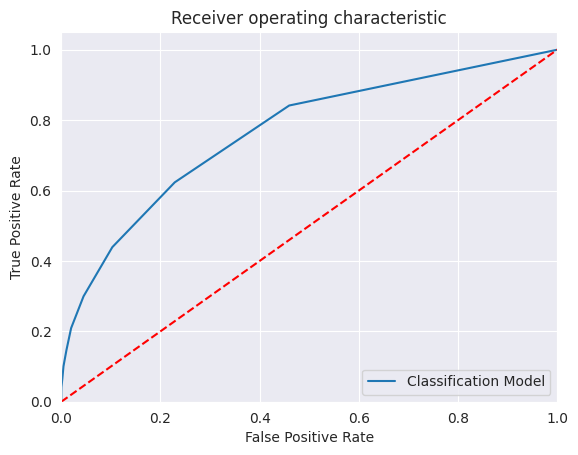

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  222  1652]
 [   96 14953]]
Outcome values : 
 222 1652 96 14953
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.12      0.20      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.80      0.56      0.57     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.7 %
Precision : 69.8 %
Recall : 11.8 %
F1 Score : 0.203
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 55.6 %
MCC : 0.259
roc_auc_score: 0.556


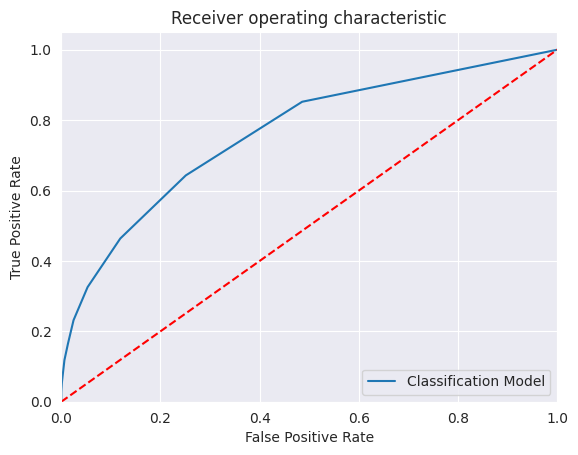

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  256  1618]
 [  131 14918]]
Outcome values : 
 256 1618 131 14918
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.14      0.23      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.78      0.56      0.59     16923
weighted avg       0.88      0.90      0.87     16923

Accuracy : 89.7 %
Precision : 66.1 %
Recall : 13.7 %
F1 Score : 0.226
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 56.4 %
MCC : 0.268
roc_auc_score: 0.564


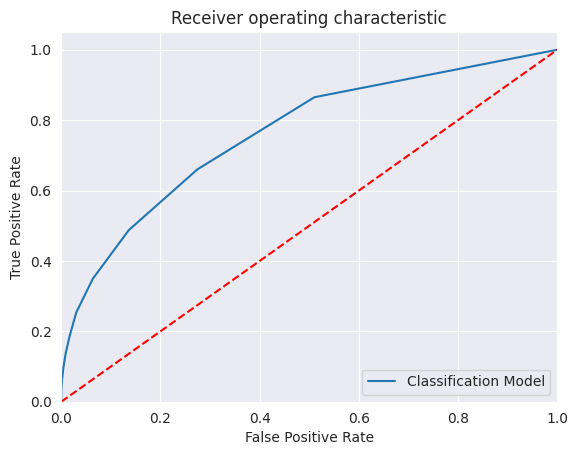

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  208  1666]
 [   89 14960]]
Outcome values : 
 208 1666 89 14960
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.11      0.19      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.80      0.55      0.57     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.6 %
Precision : 70.0 %
Recall : 11.1 %
F1 Score : 0.192
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 55.2 %
MCC : 0.251
roc_auc_score: 0.553


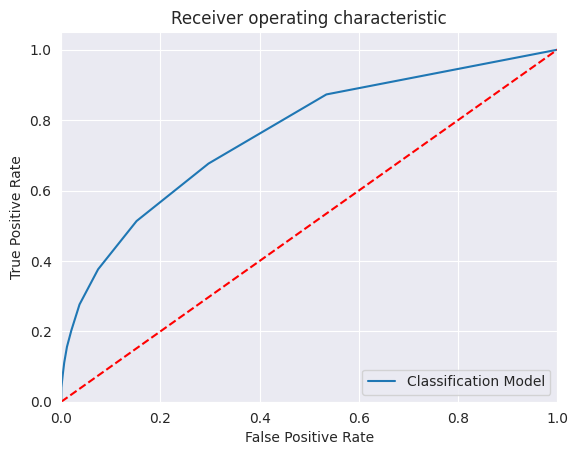

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[  243  1631]
 [  121 14928]]
Outcome values : 
 243 1631 121 14928
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.13      0.22      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.78      0.56      0.58     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.6 %
Precision : 66.8 %
Recall : 13.0 %
F1 Score : 0.217
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 56.1 %
MCC : 0.263
roc_auc_score: 0.561


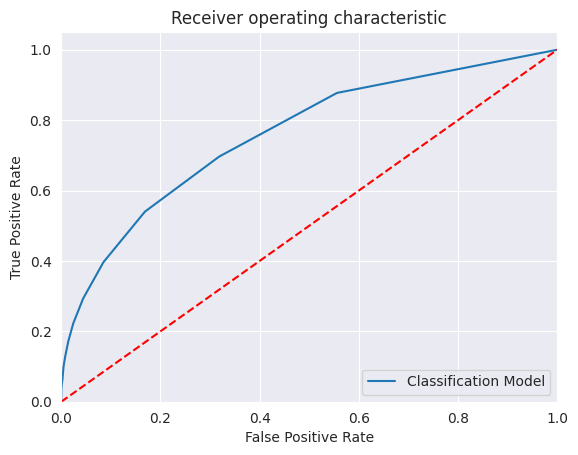

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[  213  1661]
 [   90 14959]]
Outcome values : 
 213 1661 90 14959
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.11      0.20      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.80      0.55      0.57     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.7 %
Precision : 70.3 %
Recall : 11.4 %
F1 Score : 0.196
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 55.4 %
MCC : 0.255
roc_auc_score: 0.554


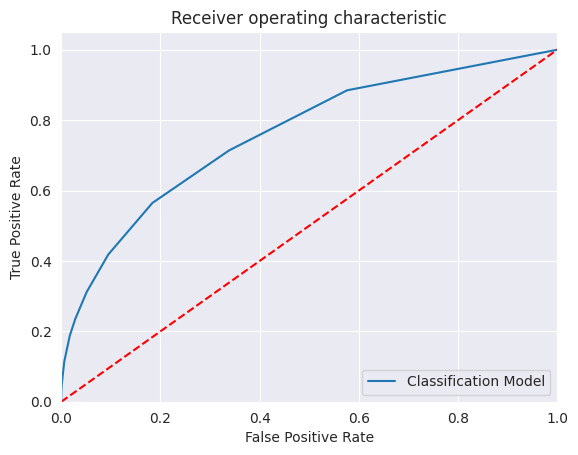

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[  238  1636]
 [  115 14934]]
Outcome values : 
 238 1636 115 14934
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.13      0.21      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.79      0.56      0.58     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.7 %
Precision : 67.4 %
Recall : 12.7 %
F1 Score : 0.214
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 56.0 %
MCC : 0.262
roc_auc_score: 0.56


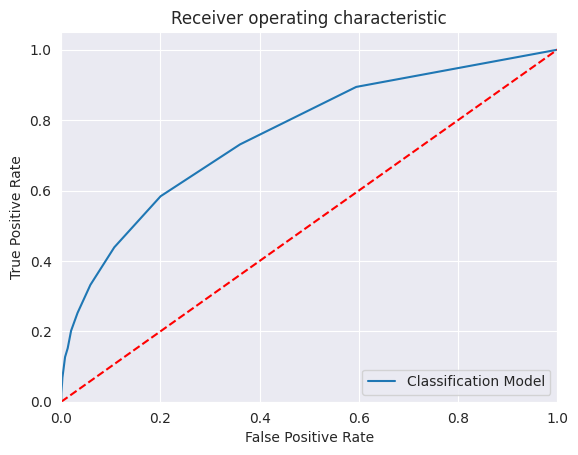

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[  200  1674]
 [   84 14965]]
Outcome values : 
 200 1674 84 14965
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.11      0.19      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.80      0.55      0.56     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.6 %
Precision : 70.4 %
Recall : 10.7 %
F1 Score : 0.185
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 55.0 %
MCC : 0.247
roc_auc_score: 0.551


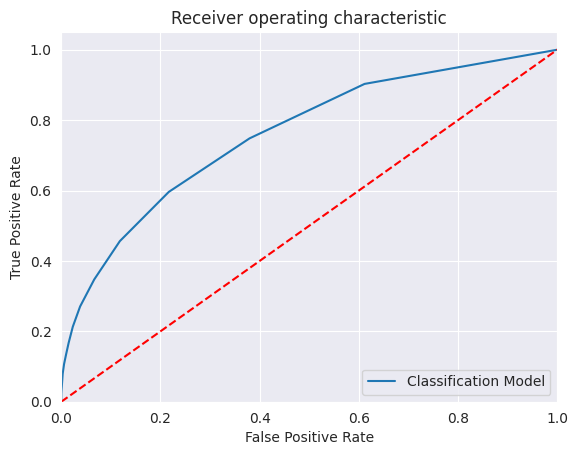

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[  225  1649]
 [  110 14939]]
Outcome values : 
 225 1649 110 14939
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.12      0.20      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.79      0.56      0.57     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.6 %
Precision : 67.2 %
Recall : 12.0 %
F1 Score : 0.204
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 55.6 %
MCC : 0.254
roc_auc_score: 0.556


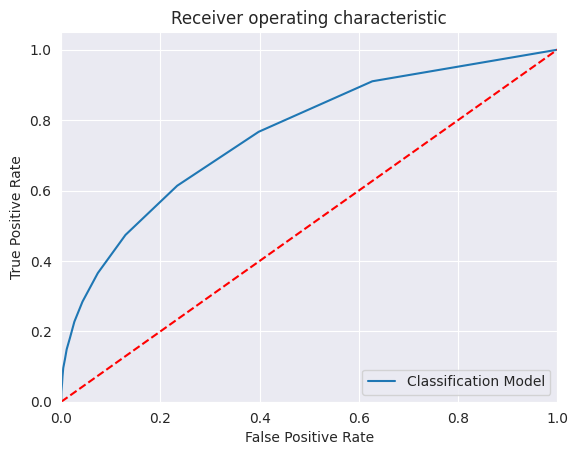

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[  199  1675]
 [   76 14973]]
Outcome values : 
 199 1675 76 14973
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.11      0.19      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.81      0.55      0.56     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.7 %
Precision : 72.4 %
Recall : 10.6 %
F1 Score : 0.185
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 55.0 %
MCC : 0.251
roc_auc_score: 0.551


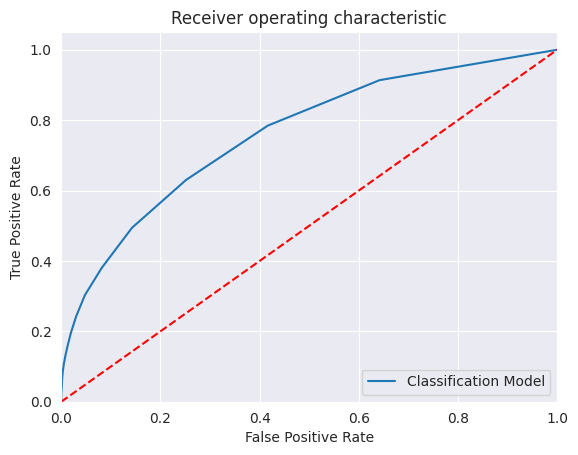

In [35]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


SVM Algorithm

SVM Linear

Model Name:  SVM - Linear
Confusion matrix : 
 [[  208  1666]
 [  218 14831]]
Outcome values : 
 208 1666 218 14831
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.11      0.18      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.89     16923
   macro avg       0.69      0.55      0.56     16923
weighted avg       0.85      0.89      0.86     16923

Accuracy : 88.9 %
Precision : 48.8 %
Recall : 11.1 %
F1 Score : 0.181
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 54.8 %
MCC : 0.193
roc_auc_score: 0.548


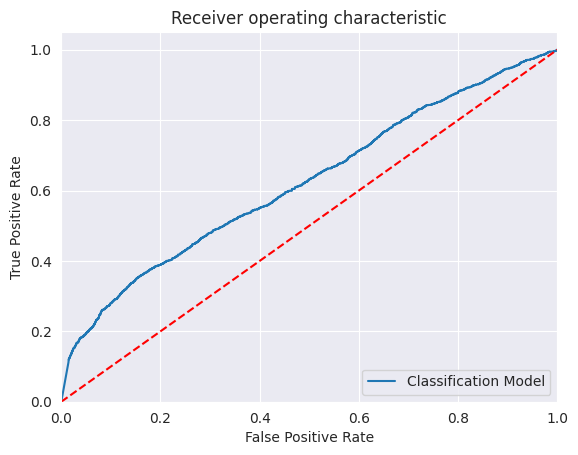

-----------------------------------------------------------------------------------------------------


In [39]:

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)



# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---


In [42]:
from google.colab import drive
drive.mount('/content/drive')
EMResults1 = pd.read_csv(r'/content/drive/MyDrive/student/EMResults.csv',header = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)

In [45]:
EMResults1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,208,1666,218,14831,0.889,0.488,0.111,0.181,0.986,0.193,0.548253,0.548


In [37]:
from google.colab import drive
drive.mount('/content/drive')
EM_Results = pd.read_csv(r'/content/drive/MyDrive/student/EMResults.csv',header = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SVM Polynomial

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[  140  1734]
 [   71 14978]]
Outcome values : 
 140 1734 71 14978
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.07      0.13      1874
           0       0.90      1.00      0.94     15049

    accuracy                           0.89     16923
   macro avg       0.78      0.53      0.54     16923
weighted avg       0.87      0.89      0.85     16923

Accuracy : 89.3 %
Precision : 66.4 %
Recall : 7.5 %
F1 Score : 0.134
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 53.5 %
MCC : 0.198
roc_auc_score: 0.535


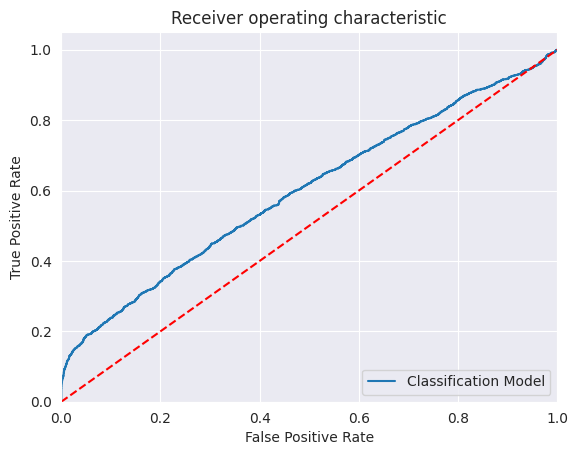

-----------------------------------------------------------------------------------------------------


In [46]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)


# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---


In [47]:
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

In [48]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,208,1666,218,14831,0.889,0.488,0.111,0.181,0.986,0.193,0.548253,0.548
1,SVM - Polynominal,140,1734,71,14978,0.893,0.664,0.075,0.134,0.995,0.198,0.534994,0.535


SVM Guassian

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 1099   775]
 [ 3430 11619]]
Outcome values : 
 1099 775 3430 11619
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.59      0.34      1874
           0       0.94      0.77      0.85     15049

    accuracy                           0.75     16923
   macro avg       0.59      0.68      0.60     16923
weighted avg       0.86      0.75      0.79     16923

Accuracy : 75.2 %
Precision : 24.3 %
Recall : 58.6 %
F1 Score : 0.343
Specificity or True Negative Rate : 77.2 %
Balanced Accuracy : 67.9 %
MCC : 0.254
roc_auc_score: 0.679


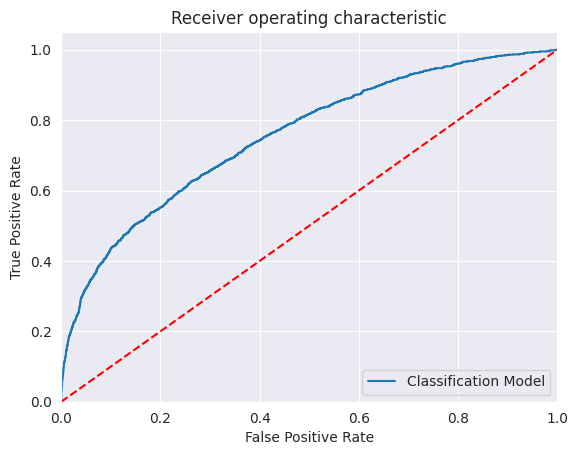

-----------------------------------------------------------------------------------------------------


In [49]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name

print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve



from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---


In [50]:
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

Sigmoid Kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 825 1049]
 [8241 6808]]
Outcome values : 
 825 1049 8241 6808
Classification report : 
               precision    recall  f1-score   support

           1       0.09      0.44      0.15      1874
           0       0.87      0.45      0.59     15049

    accuracy                           0.45     16923
   macro avg       0.48      0.45      0.37     16923
weighted avg       0.78      0.45      0.55     16923

Accuracy : 45.1 %
Precision : 9.1 %
Recall : 44.0 %
F1 Score : 0.151
Specificity or True Negative Rate : 45.2 %
Balanced Accuracy : 44.6 %
MCC : -0.068
roc_auc_score: 0.446


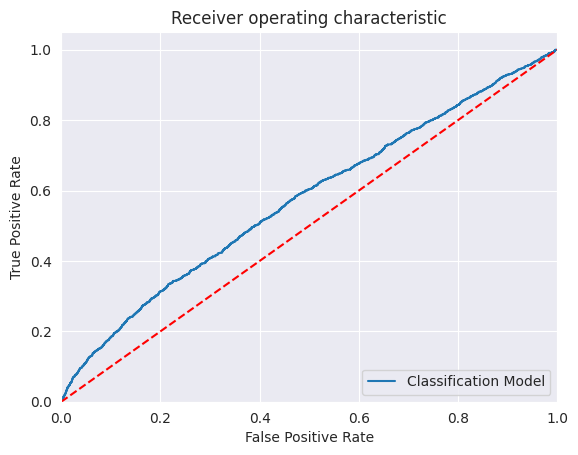

-----------------------------------------------------------------------------------------------------


In [51]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)


# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---



In [52]:
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [53]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,208,1666,218,14831,0.889,0.488,0.111,0.181,0.986,0.193,0.548253,0.548
1,SVM - Polynominal,140,1734,71,14978,0.893,0.664,0.075,0.134,0.995,0.198,0.534994,0.535
2,SVM - Gaussian,1099,775,3430,11619,0.752,0.243,0.586,0.343,0.772,0.254,0.679262,0.679
3,SVM - Sigmoid,825,1049,8241,6808,0.451,0.091,0.440,0.151,0.452,-0.068,0.446312,0.446


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  156  1718]
 [   56 14993]]
Outcome values : 
 156 1718 56 14993
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.08      0.15      1874
           0       0.90      1.00      0.94     15049

    accuracy                           0.90     16923
   macro avg       0.82      0.54      0.55     16923
weighted avg       0.88      0.90      0.86     16923

Accuracy : 89.5 %
Precision : 73.6 %
Recall : 8.3 %
F1 Score : 0.15
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 54.0 %
MCC : 0.224
roc_auc_score: 0.54


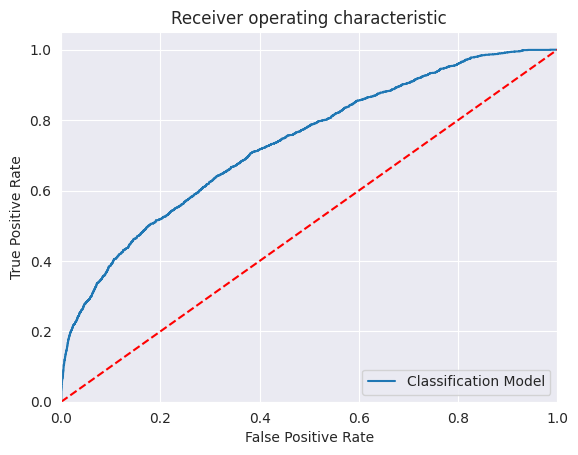

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1124   750]
 [ 1180 13869]]
Outcome values : 
 1124 750 1180 13869
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.60      0.54      1874
           0       0.95      0.92      0.93     15049

    accuracy                           0.89     16923
   macro avg       0.72      0.76      0.74     16923
weighted avg       0.90      0.89      0.89     16923

Accuracy : 88.6 %
Precision : 48.8 %
Recall : 60.0 %
F1 Score : 0.538
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 76.1 %
MCC : 0.477
roc_auc_score: 0.761


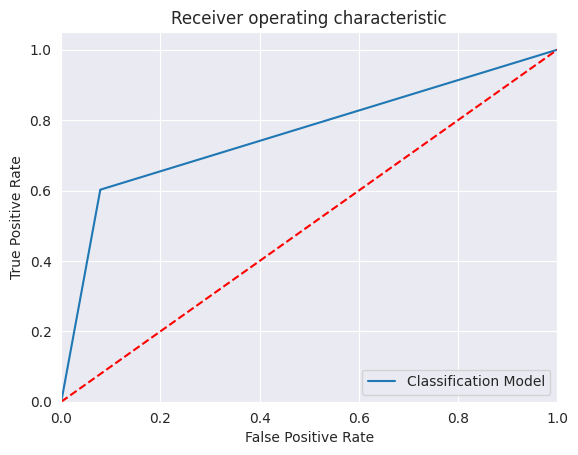

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  961   913]
 [  128 14921]]
Outcome values : 
 961 913 128 14921
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.51      0.65      1874
           0       0.94      0.99      0.97     15049

    accuracy                           0.94     16923
   macro avg       0.91      0.75      0.81     16923
weighted avg       0.94      0.94      0.93     16923

Accuracy : 93.8 %
Precision : 88.2 %
Recall : 51.3 %
F1 Score : 0.649
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 75.2 %
MCC : 0.645
roc_auc_score: 0.752


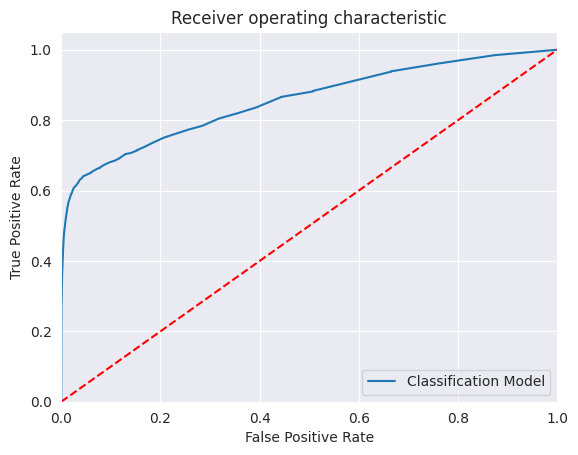

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1004   870]
 [  200 14849]]
Outcome values : 
 1004 870 200 14849
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.54      0.65      1874
           0       0.94      0.99      0.97     15049

    accuracy                           0.94     16923
   macro avg       0.89      0.76      0.81     16923
weighted avg       0.93      0.94      0.93     16923

Accuracy : 93.7 %
Precision : 83.4 %
Recall : 53.6 %
F1 Score : 0.652
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 76.2 %
MCC : 0.638
roc_auc_score: 0.761


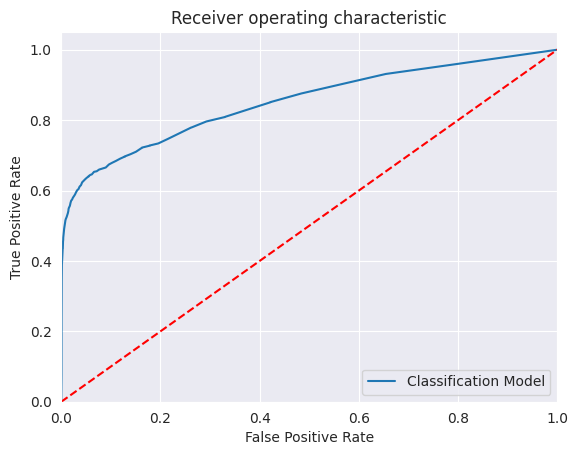

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  462  1412]
 [  299 14750]]
Outcome values : 
 462 1412 299 14750
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.25      0.35      1874
           0       0.91      0.98      0.95     15049

    accuracy                           0.90     16923
   macro avg       0.76      0.61      0.65     16923
weighted avg       0.88      0.90      0.88     16923

Accuracy : 89.9 %
Precision : 60.7 %
Recall : 24.7 %
F1 Score : 0.351
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 61.3 %
MCC : 0.343
roc_auc_score: 0.613


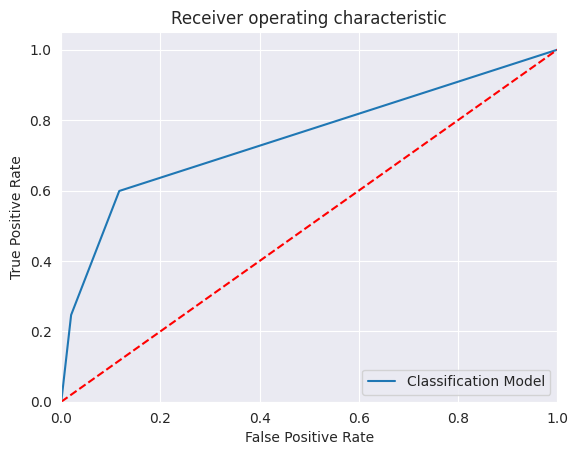

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  208  1666]
 [  218 14831]]
Outcome values : 
 208 1666 218 14831
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.11      0.18      1874
           0       0.90      0.99      0.94     15049

    accuracy                           0.89     16923
   macro avg       0.69      0.55      0.56     16923
weighted avg       0.85      0.89      0.86     16923

Accuracy : 88.9 %
Precision : 48.8 %
Recall : 11.1 %
F1 Score : 0.181
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 54.8 %
MCC : 0.193
roc_auc_score: 0.548


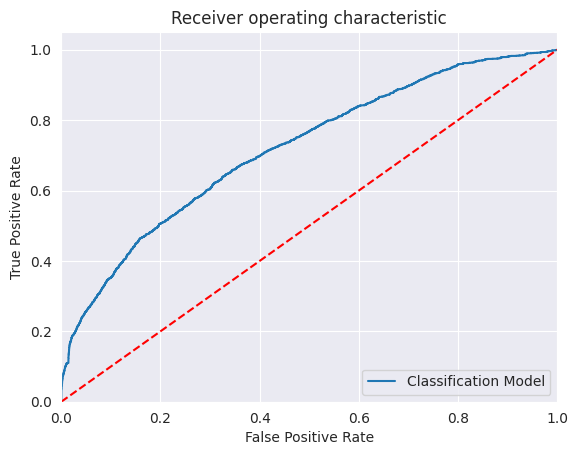

-----------------------------------------------------------------------------------------------------


In [54]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=2)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,  ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EM_Results = EM_Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

Random Forest

In [ ]:
#to buildthe 'random forest' model with random sampling
from sklearn.ensemble import RandomForestClassifier
#create model object
ModelRF= RandomForestClassifier()
ModelRF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#predicting the X_test values
y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

In [ ]:
#importing the required libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)


Confusion matrix : 
 [[ 1001   873]
 [   76 14973]]


In [ ]:
#outcome values
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 1001 873 76 14973


In [ ]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.53      0.68      1874
           0       0.94      0.99      0.97     15049

    accuracy                           0.94     16923
   macro avg       0.94      0.76      0.82     16923
weighted avg       0.94      0.94      0.94     16923



In [ ]:
# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);

precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

In [ ]:
#printing the Accuracy presition F1Score specificity and Balanced_Accuracy
from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

Accuracy : 94.4 %
Precision : 92.9 %
Recall : 53.4 %
F1 Score : 0.678
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 76.4 %
MCC : 0.68


In [ ]:
#area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))


roc_auc_score: 0.765


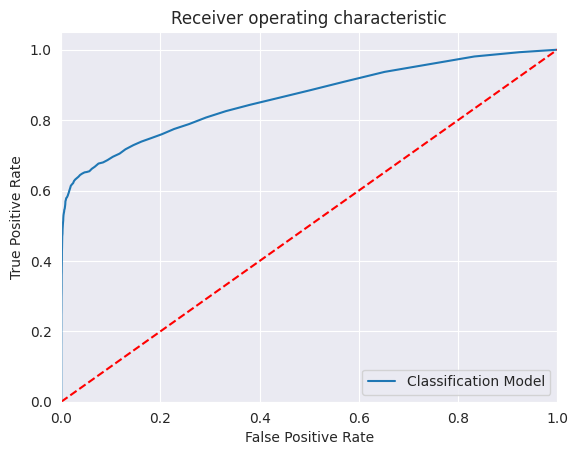

-----------------------------------------------------------------------------------------------------


In [ ]:
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

In [ ]:
#Display the Final result

Results = pd.DataFrame({'HRData_A':y_test,'HRData_P':y_pred})

#Merge two Dataframes on index of both the dataframes

ResultsFinal = HRData_BK.merge(Results,left_index=True,right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,HRData_A,HRData_P
950,73959,HR,region_2,Below Secondary,f,sourcing,1,20,NaN,1,0,47,0,0,0
7568,59199,Analytics,region_22,Master's & above,m,other,1,31,3.0,5,0,86,0,0,0
36582,72053,Sales & Marketing,region_22,Bachelor's,m,referred,2,27,NaN,1,0,47,0,0,0
27501,77973,Sales & Marketing,region_2,Bachelor's,f,sourcing,2,51,3.0,23,0,53,0,0,0
36804,795,HR,region_2,NaN,f,other,1,31,3.0,3,0,52,0,0,0
23942,14601,Procurement,region_2,Master's & above,m,other,2,31,3.0,6,0,72,0,0,0
54419,21662,Operations,region_15,Bachelor's,m,referred,1,37,5.0,7,0,60,0,0,0
46764,72101,Sales & Marketing,region_7,Bachelor's,m,sourcing,1,33,4.0,7,0,49,0,0,0
51881,68564,Technology,region_7,Bachelor's,m,sourcing,1,30,5.0,6,0,95,1,1,1
14555,64119,Sales & Marketing,region_29,Bachelor's,m,other,1,37,1.0,7,0,50,0,0,0


Predicting the Is_Promoted of Test Data

In [ ]:
y_predtest = ModelRF.predict(Test)

In [ ]:
Results=pd.DataFrame({'is_predicted':y_predtest})

# Merge two Dataframes on index of both the dataframes

ResultsFinal=Test_BK.merge(Results,left_index=True,right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_predicted
13613,17552,Sales & Marketing,region_2,Master's & above,m,other,1,49,4.000000,4,0,55,1
17431,61357,Sales & Marketing,region_34,Bachelor's,m,sourcing,1,27,3.339146,1,1,48,1
5338,41357,Technology,region_7,Bachelor's,m,sourcing,3,30,3.000000,3,1,79,1
9045,45481,Technology,region_13,Bachelor's,m,other,1,26,3.339146,1,0,77,1
8892,34095,Operations,region_28,Bachelor's,f,sourcing,1,31,3.000000,4,0,62,1
10254,19960,Sales & Marketing,region_25,Master's & above,m,other,1,37,3.000000,3,0,50,1
8897,73682,Sales & Marketing,region_15,Bachelor's,m,other,1,23,3.339146,1,0,48,1
19049,11859,Procurement,region_22,Bachelor's,m,other,1,39,1.000000,11,0,71,1
10473,70328,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,29,2.000000,3,0,48,1
6363,69081,Sales & Marketing,region_15,Bachelor's,m,other,2,25,2.000000,3,0,46,1
